In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
# Load data
df_raw = pd.read_excel('../data/Concrete_Data.xls')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
# Preprocessing
df_baking = df_raw.copy()

df_baking.columns = (
    [
     'cement',
     'blast_furnance_slag',
     'fly_ash',
     'water',
     'superplasticizer',
     'coarse_aggregate',
     'fine_aggregate',
     'age',
     'compressive_strength'
     ]
)

df_baking['log_age'] = df_baking['age'].apply(lambda x: np.log(x))
df_baking = df_baking.drop(columns=['age'])

df = df_baking.copy()
df.sample(10)

,cement,blast_furnance_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,compressive_strength,log_age
419,165.00,0.02,143.57,163.81,0.00,1005.6,900.9,16.878372,2.639057
858,322.00,149.00,0.00,186.00,8.00,951.0,709.0,52.420860,3.332205
381,315.00,137.00,0.00,145.00,5.90,1130.0,745.0,81.751169,3.332205
723,310.00,0.00,0.00,192.00,0.00,1012.0,830.0,27.827251,3.332205
470,251.37,0.00,118.27,192.94,5.75,1043.6,754.3,40.148187,4.605170
49,380.00,95.00,0.00,228.00,0.00,932.0,594.0,32.823194,1.945910
681,173.00,116.00,0.00,192.00,0.00,946.8,856.8,24.281966,3.332205
862,140.00,164.00,128.00,237.00,6.00,869.0,656.0,35.225329,3.332205
152,362.60,189.00,0.00,164.90,11.60,944.7,755.8,77.297154,4.025352
90,389.90,189.00,0.00,145.90,22.00,944.7,755.8,40.596347,1.098612


In [8]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

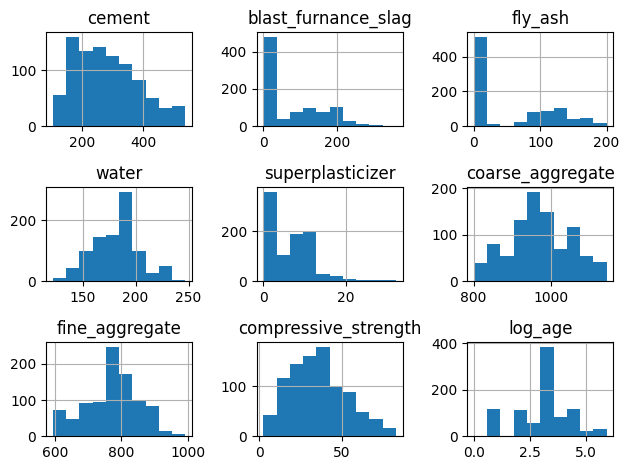

In [9]:
df_train.hist()
plt.tight_layout()
plt.show()

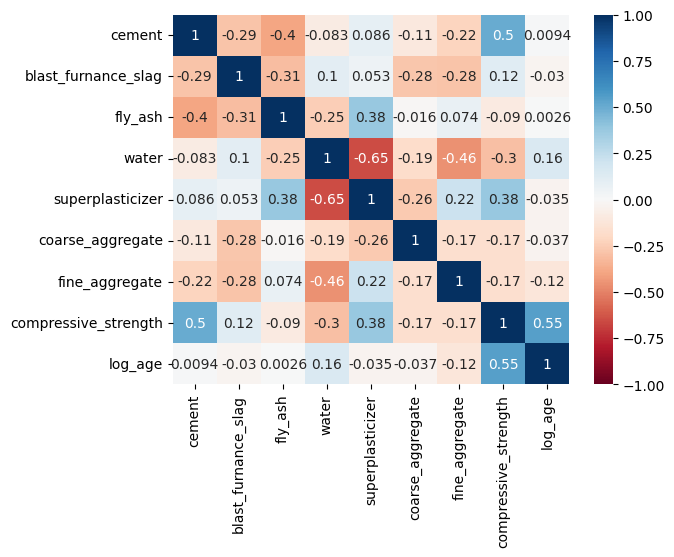

In [13]:
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, cmap='RdBu')
plt.show()

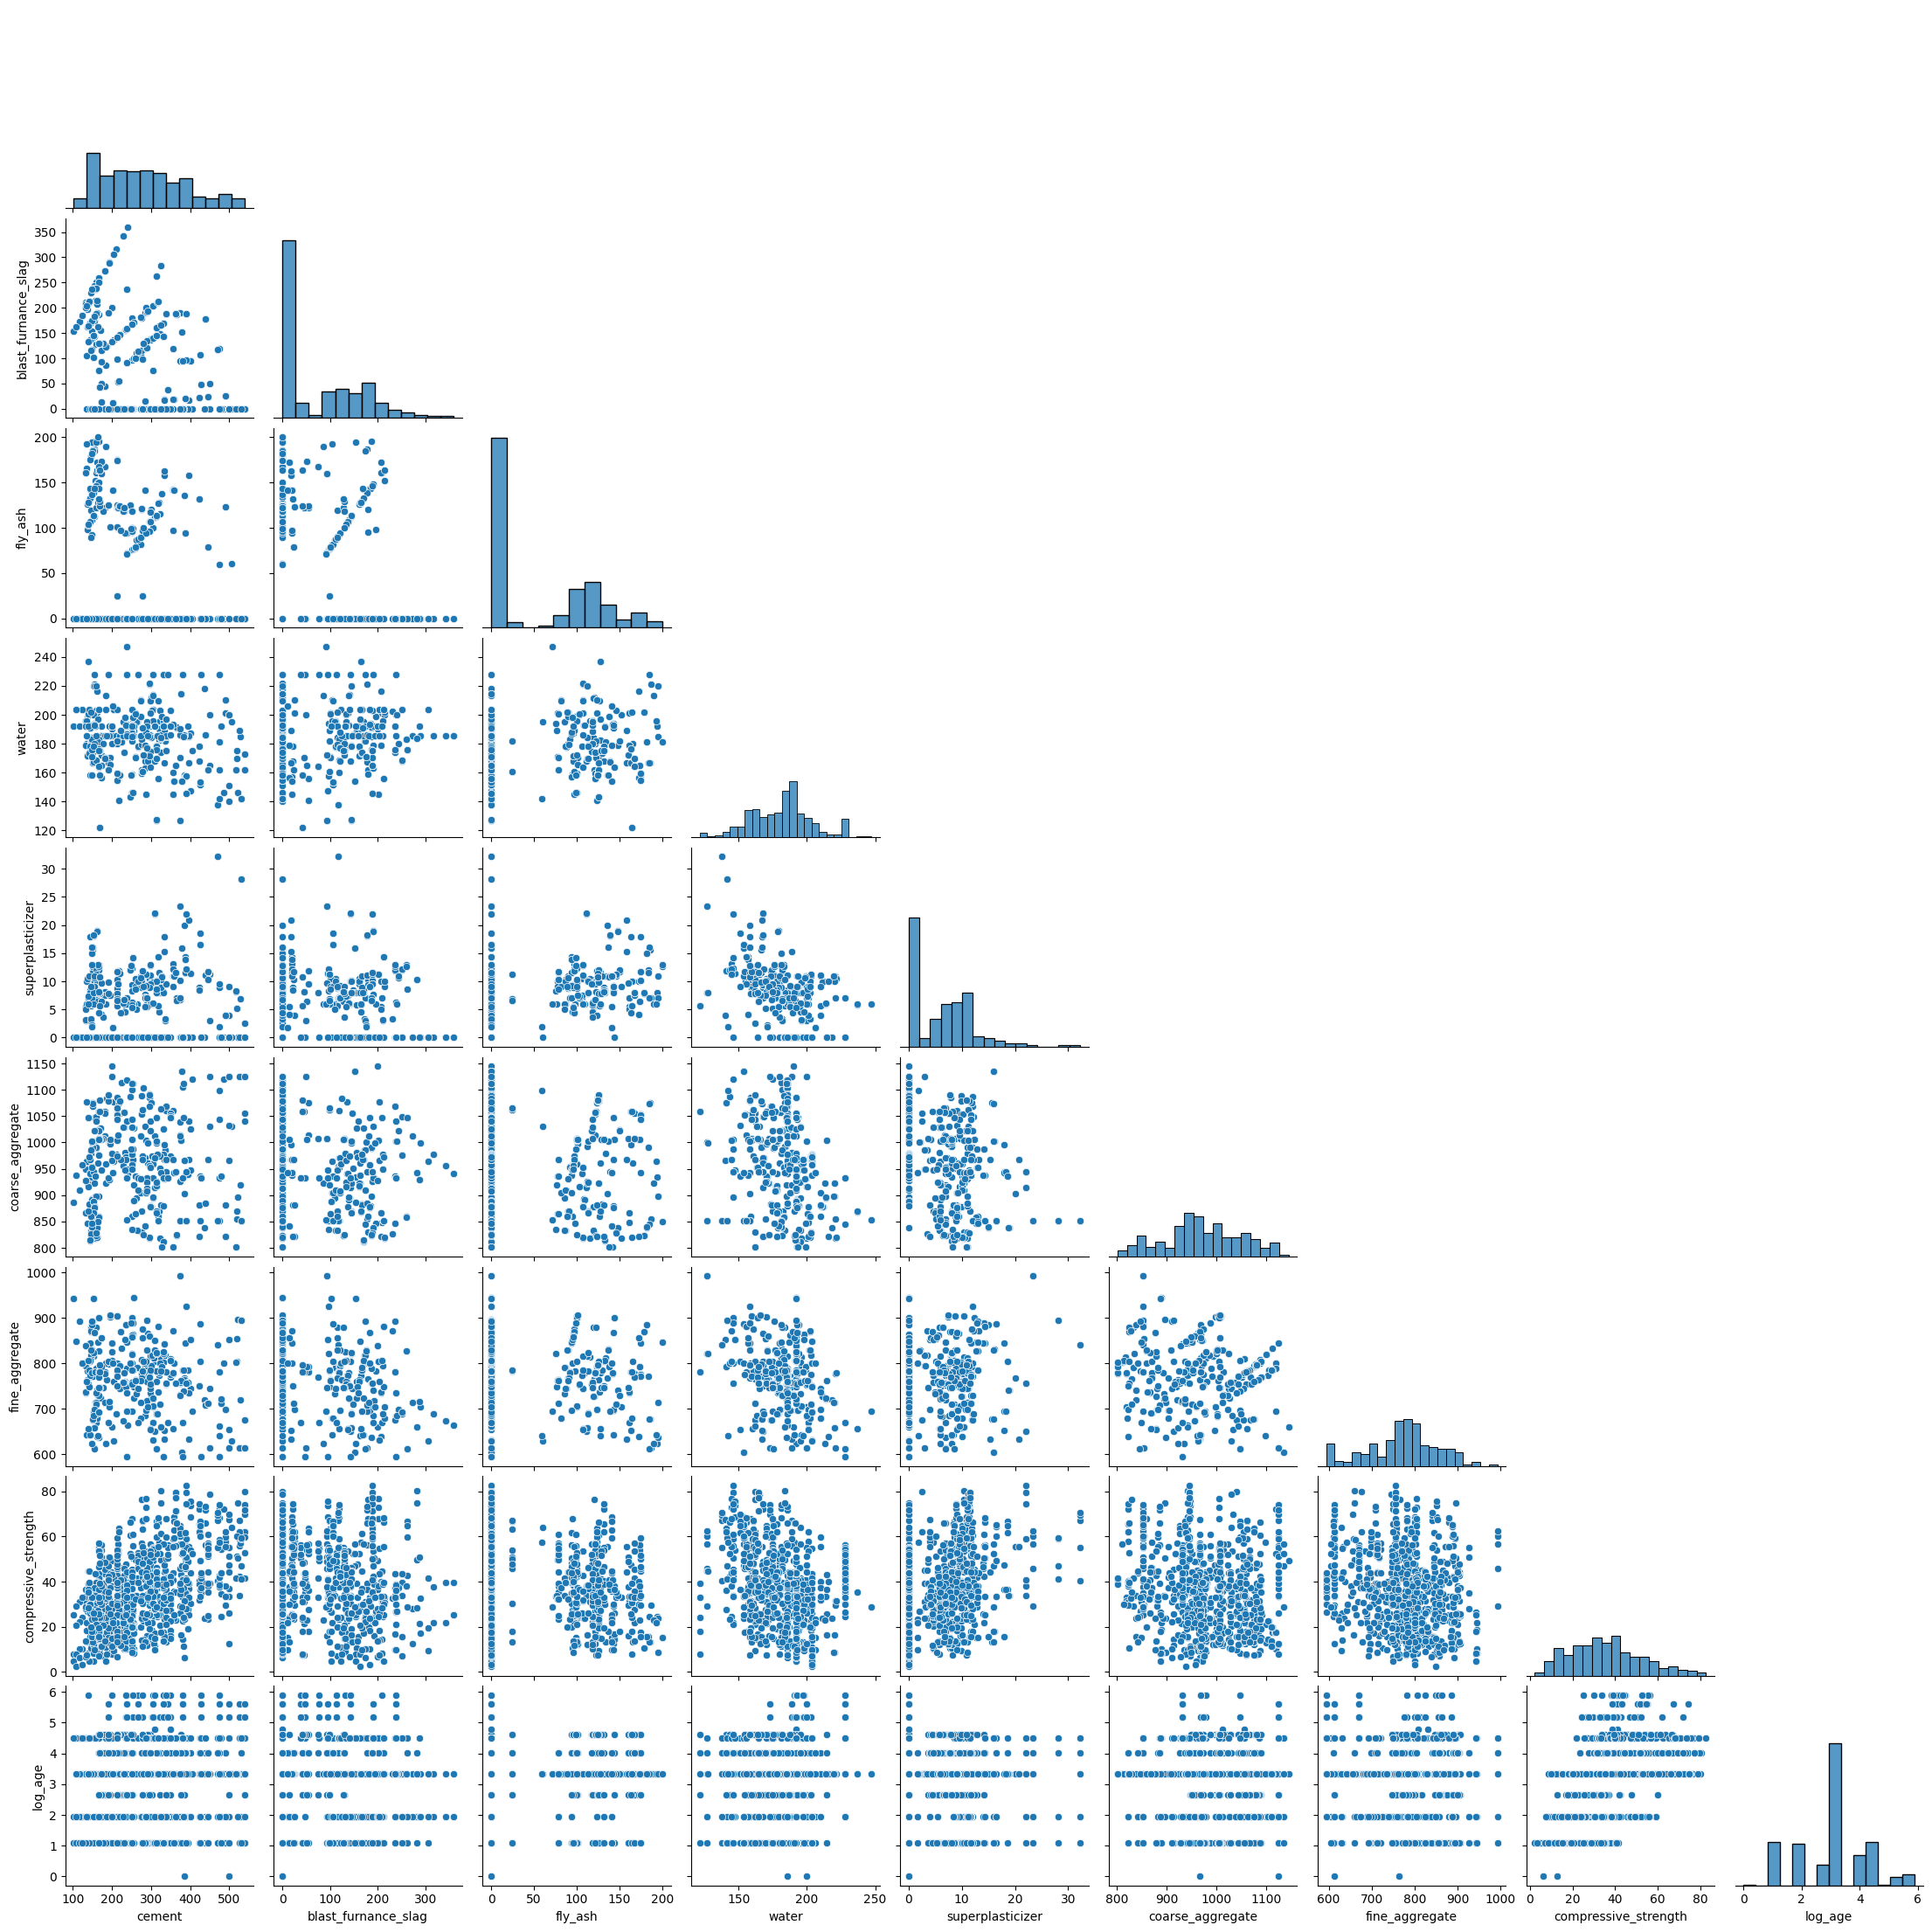

In [15]:
sns.pairplot(df_train, corner=True)
plt.show()

In [16]:
df_train.to_csv('../data/processed/df_train.csv')
df_test.to_csv('../data/processed/df_test.csv')